In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

In [7]:
import sys
sys.path.append("../scripts/")

In [8]:
from utils import split_data, plot_2d_data

In [9]:
# load data from parquet file
df = pd.read_parquet("../data/correctly_labeled.parquet")

In [10]:
data_x, data_y, data_y_string = split_data(df)

In [12]:
from cuml.manifold import TSNE
from cuml.common.device_selection import using_device_type
with using_device_type('gpu'):
    x_tsne = TSNE(n_components=2).fit_transform(data_x)

/home/sharaf/anaconda3/envs/rapids-23.06/lib/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


[W] [11:40:36.430362] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


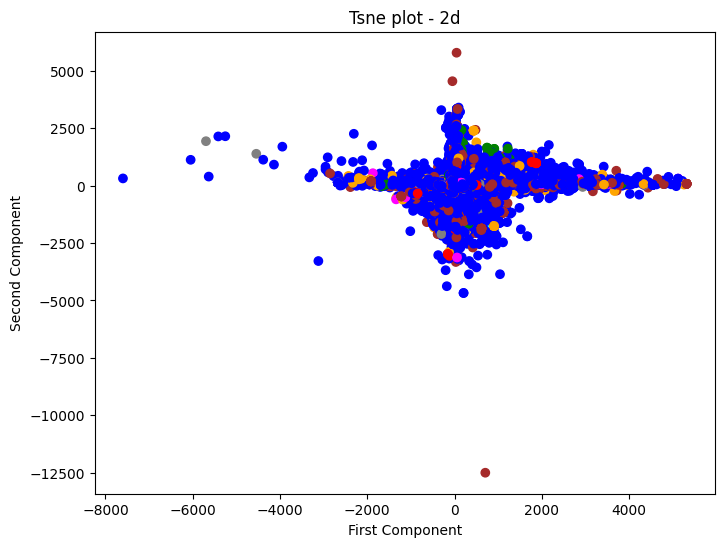

In [22]:
def tsne_plot(x_tsne, class_labels):
    # colour map
    class_colors = {
    'SSH-Bruteforce': 'red',
    'Benign': 'blue',
    'DDoS attacks-LOIC-HTTP': 'green',
    'DDOS attack-HOIC': 'orange',
    'DoS attacks-Slowloris': 'purple',
    'DoS attacks-Hulk': 'brown',
    'FTP-BruteForce': 'pink',
    'Infilteration': 'gray',
    'Bot': 'cyan',
    'DoS attacks-GoldenEye': 'magenta',
    'Brute Force -Web': 'yellow',
    'DoS attacks-SlowHTTPTest': 'teal',
    'SQL Injection': 'lime',
    'DDOS attack-LOIC-UDP': 'salmon',
    'Brute Force -XSS': 'olive'
    }

    # colours 
    colors = [class_colors[label] for label in class_labels]
    plt.figure(figsize=(8, 6))
    plt.scatter(x_tsne.iloc[:, 0], x_tsne.iloc[:, 1], c=colors)
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    plt.title("Tsne plot - 2d")
    plt.show()

tsne_plot(x_tsne, data_y_string)